<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Алина! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Обращаю внимание, что комментарии ревьюера после проверки удалять нельзя они помогают отследить логику исправления или изменения проекта. Это дополнительный навык при обучении. Свой исправляемый код лучше тоже не удалять, а ремить #, это позволит акцентировать изменения в ходе подготовки окончательного варианта проекта.<br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что у нас получилось!</b></font>

# Сборный проект

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Описание данных**

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Цель проекта**

Нужно выявить определяющие успешность игры закономерности и отработать принцип работы с данными.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Было бы правильно добавить план исследования в описание проекта.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Все проекты, это как часть реального исследования, за которое деньги заплатят или не заплатят. <br>А отчет читают: сначала описание, о чем идет речь и что делаем, потом выводы: что в итоге получили. А когда у заказчика в голове все сложилось, то смотрят как это делалось. То есть, в описании необходимо отразить какая цель исследования, какой контекст (особенности отрасли и данных), что мы планируем делать (план исследования). <br>И в реальном проекте не будет инструкции и задач, которые необходимо выполнить, по этому следует научиться делать описание проекта самостоятельно.</font>

**Импортируем библиотеки**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom
import seaborn as sns

**Шаг 1. Откроем файл с данными и изучим общую информацию**

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вывод: 
- датафрейм содержит 16715 записей
- названия столбцов некорректные, нужно привести к нижнему регистру
- в таблице есть пропуски
- у некоторых столбцов некорректный тип данных.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, изучили данные для предобработки.</font>

**Шаг 2. Подготовим данные**

*Заменим названия стобцов (приведем к нижнему регистру)*

In [5]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍 Иногда пишут длинный словарь для замены колонок, как в проекте по музыке.</font>

*Проведем поиск дубликатов*

In [6]:
df.duplicated().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены явные дубликаты, иногда они сильно искажают анализ.</font><br>
<font color='Red'>🛠 Но не произведена проверка неявных дубликатов и не принято решение по их обработке. Данная проверка является составной частью первичного анализа данных. Проверять следует по имени, платформе и году релиза  одновременно.</font>

In [7]:
df[df.duplicated(['name', 'platform', 'year_of_release'])].count()

name               1
platform           2
year_of_release    2
genre              1
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       1
user_score         1
rating             1
dtype: int64

In [8]:
df = df.drop_duplicates(['name', 'platform', 'year_of_release'])
display(df[df.duplicated(['name', 'platform', 'year_of_release'])].count())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Обработала неявные пропуски.</b></font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, исправили.</font>
<br>
<font color='DarkMagenta'>👉 Только не пропуски, а неявные дубликаты.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Да, дубликаты, прошу прощения.</b></font>

*Обработаем пропуски*

In [9]:
df.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [10]:
df = df.dropna(subset = ['name'])
df['name'].isna().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что удалили пропуски в названии игр, тем более в этих строках еще хватает пропусков по другим колонкам.</font>

*В данном столбце мы удалили строки с пропусками, так как их очень мало, на анализ они не повлияют.*

In [11]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'].isna().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильное решение по удалению пропусков в годах релиза.</font>

*Так же мы поступили со столбцом `year_of_release`.*

In [12]:
df = df.dropna(subset=['genre'])
df['genre'].isna().sum()

0

*И так же сделали с `genre`.*

In [13]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['critic_score'].isna().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Если это заглушка в отзывах критиков, то лучше было поставить отрицательное число, а потом при анализе его фильтровать. Или оставить пропуск, только его потом фильтровать при необходимости. Не рекомендуется когда значение заглушки попадает в диапазон допустимых значений колонки с данными, в нашем случае это 0 - 100.</font>

<font color='DarkBlue'><b>Комментарий ревьюера: Глоссарий</b></font><br>
<font color='DarkGreen'>👌 В контексте анализа и предобработки датасета часто используютется термин: <b>Заглушка</b>. <br>Из словаря: "Заглушка — приспособление для закрывания отверстия наглухо." <br>В нашем контексте закрытие пропуска в датасете каким-то значением, совпадающим по типу с данными колонки таблицы. Как правило, для числовых данных заглушка должна быть вне диапазона значений колонки. При анализе по данной колонке заглушка или фильтруется, или включается в анализ, если сам пропуск не является ошибкой сбора данных и несет какой-то признак. <br>Частая ошибка, когда заглушке присваивается числовое значение, например `0`, а в данных колонки присутствуют символьные значения `'0'`, то при преобразовании к числовому типу произойдет слияние значимых данных таблицы и заглушки.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Поставила в качестве заглушки отрицательное число</b></font>

*В данном столбце мы заменили пропуски на -1, так как методы `mean()` и `median()` могут привести к неверным данным.*

In [14]:
df['user_score'] = df['user_score'].fillna(-1)
df['user_score'].value_counts()

-1     6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
0.9       2
1         2
1.1       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

*Данный столбец имеет значение "tbd". Мы провели поиск этой аббревиатуры и выяснили, что это может значить "будет определено позже", то есть оценку еще не поставили. Так же присвоим значение -1, чтобы не допустить некорретных данных.*

In [15]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1
df['user_score'].value_counts()

-1     8981
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.2       2
0.5       2
0.7       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Правильный подход к замене 'tbd' и пропусков заглушкой. Но ошибка заключается в том, что данное значение заглушки входит в диапазон значений колонки отзывов пользователей, что не допустимо, тем более значение '0' уже присутствует в колонке, не смотря, что оно только одно.</font><br>
<font color='DarkMagenta'>👉 Можно поставить отрицательное значение, например -1, и его фильтровать при анализе отзывов и тесте гипотез. Или 'tbd' перевести в пропуски и пропуски не обрабатывать, тогда в анализе отзывов они мешать не будут, но надо будет фильтровать при тестировании гипотез.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Исправила, так же поставила -1</b></font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно.</font>

In [16]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
df['rating'] = df['rating'].fillna('unknown')
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Правильно поставлена заглушка на пропуски в колонке рейтинга. А если посмотреть в интернете, что такое рейтинг ESRB, то узнаем, что это рейтинг для США и Канады. А значит пропуск не связан с ошибкой заполнения данных, просто не только для Северной Америки выпускаются игры.</font>

In [18]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

*Пропуски обработаны.*

*Преобразуем данные в нужные типы*

In [19]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('int')
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что перевели типы данных. 👍</font>

*В столбце `year_of_release` изменили тип данных на `int`, так как год выпуска - это целое число, которое не может иметь десятичных дробей. В столбце `user_score` содержатся числовые значения, с которыми в дальнейшем будут проводиться расчеты или сравнения, поэтому поменяли тип данных на float. У остальных столбцов корректный тип данных.*

*Посчитаем суммарные продажи во всех регионах*

In [20]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодцы, не забыли создать колонку с общими продажами. 👍 </font>

Вывод: 
- дубликатов в таблице нет
- привели названия столбцов к нижнему регистру
- обработали пропуски
- изменили тип данных
- посчитали суммарные продажи во всех регионах
- разобрали значение tbd ("будет определено позже", то есть оценку еще не поставили).

Пропусками могли послужить человеческий фактор и сбои в программе.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что сделаны выводы по разделу предобработки данных. 👍</font>

In [21]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en co

**Шаг 3. Проведем исследовательский анализ данных**

**Посмотрим, сколько игр выпускалось в разные годы**

In [22]:
df['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

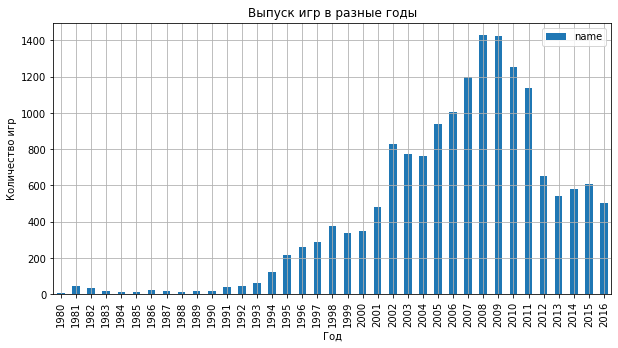

In [23]:
(
    df.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', grid=True, figsize=(10, 5))
)
plt.title('Выпуск игр в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация и правильно, что оси подписаны и есть название графика.</font>

Вывод: по графику мы видим, что пик выпуска игр приходится на 2008-2009 годы. С 1992 года количество выпущенных игр только росло, за исключением пары лет. В то время качество игр становилось все лучше, а с приходом новым технологий графика, реализация идей и сюжетов только прогрессировала. Но после 2009 года довольно резко сократилось число выпуска.

**Посмотрим, как менялись продажи по платформам**

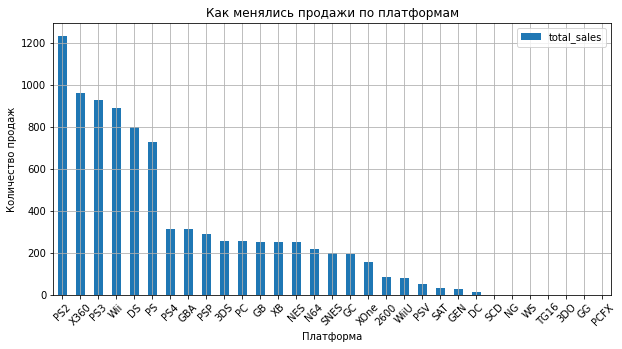

In [24]:
(
    df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', grid=True, figsize=(10, 5))
)
plt.title('Как менялись продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.show()

Вывод: больше всего интернет-магазин продал игры на платформе PS2, за ней следуют X360, PS3, Wii, DS и PS4. Данные платформы довольно популярны, благодаря чему и пользовались спросом на игры.

In [25]:
sales_by_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index().head(6)['platform'].tolist()
sales_by_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

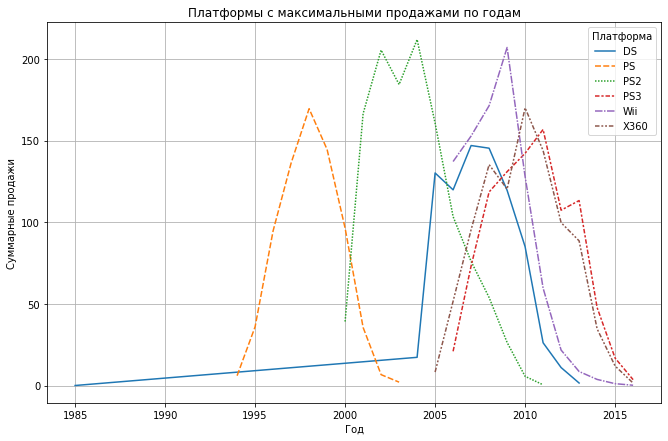

In [26]:
filtered_df = df.query('platform in @sales_by_platform')
sales_distribution = filtered_df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

plt.figure(figsize=(11, 7))
sns.lineplot(data=sales_distribution)
plt.title('Платформы с максимальными продажами по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.legend(title='Платформа')
plt.grid()
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Наверное, стоило попробовать разобраться с таким артефактом у платформы DS. Тогда бы обнаружили, что это ошибка, так как в 1985 году этой платформы еще не существовало. Визуализация помогает не только определять закономерности, но еще и находить ошибки.</font>
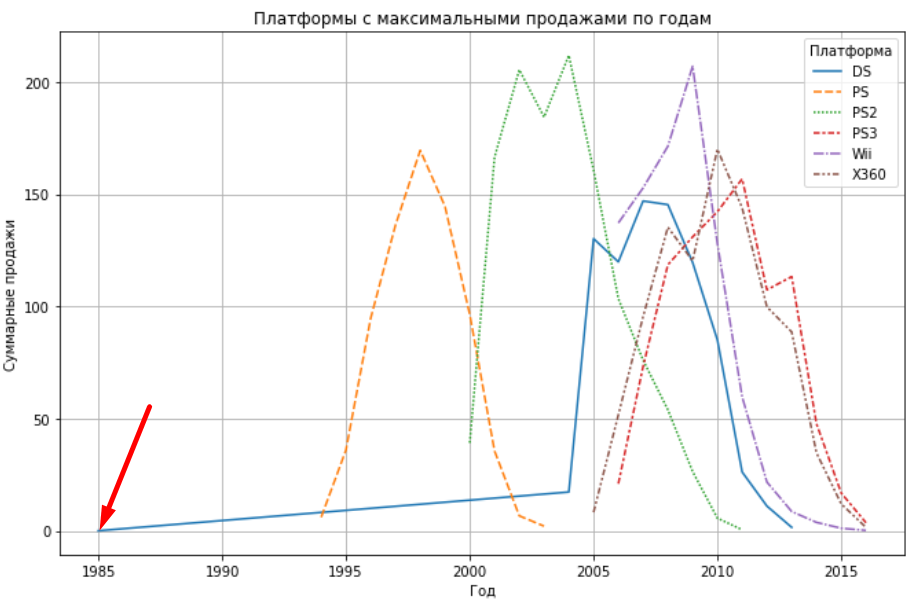

Вывод: судя по графику, каждая платформа имеет резкий рост продаж и резкий спад. Жизненный цикл платформ в среднем занимает 10 лет с начала появления на рынке продаж до ее исчезновения.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Как-то не корректно определять срок жизни платформы "на глазок", его расчет из данных таблицы был бы более уместен, например, как показано ниже. Вопрос брать ли платформы всего датасета, или ограничивать периодом начала роста продаж, остается открытым, но можно поэкспериментировать.</font>

In [27]:
# Комментарий ревьюера
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

**Возьмем данные за 2013 год для последующего исследования. Данные за предыдущие года учитывать не будем.**

**Какие платформы лидируют по продажам, растут или падают?**

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно выбран актуальный период. 👍 Сейчас в наше динамичное время в бизнесе уже используются для прогноза периоды в 2-3 года.</font>
<br>
<font color='DarkMagenta'>👉 Только зачем два фильтра? Достаточно только `>= 2013`.</font>

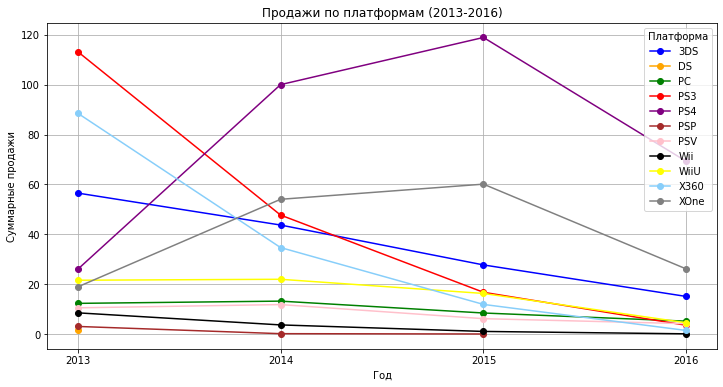

In [28]:
filtered_df = df[(df['year_of_release'] >= 2013)] # отфильтруем данные за актуальный период 2013-2016 год
sales_by_platform = filtered_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
colors = {
    '3DS': 'blue', 
    'DS': 'orange',   
    'PC': 'green',
    'PS3': 'red',
    'PS4': 'purple',
    'PSP': 'brown',
    'PSV': 'pink',
    'Wii': 'black',
    'WiiU': 'yellow',
    'X360': 'lightskyblue',
    'XOne': 'gray'
}

for platform in sales_by_platform['platform'].unique():
    platform_data = sales_by_platform[sales_by_platform['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], marker='o', label=platform, color=colors.get(platform, 'gray'))
    
plt.title('Продажи по платформам (2013-2016)')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.xticks(sales_by_platform['year_of_release'].unique())
plt.legend(title='Платформа')
plt.grid()
plt.show()

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Оставила только фильтр >= 2013</b></font>

Вывод: судя по графику лидируют платформы PS4 и XOne, но продажи резко снизились в 2015 году. На протяжении трех лет у всех остальных платформ наблюдается падение продаж.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

In [29]:
filtered_df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,31.407524,3.048724,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,37.282494,3.963069,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,-1.000000,3.500000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,72.000000,7.100000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


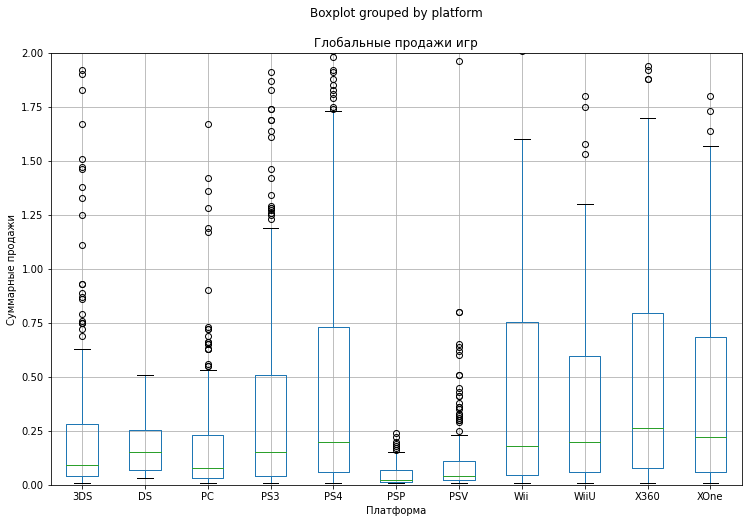

In [30]:
filtered_df.boxplot(by='platform', column=['total_sales'], figsize=(12, 8))
plt.ylim(0,2)
plt.title('Глобальные продажи игр')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Здесь уместна <b>вторая</b> диаграмма размаха со всеми максимумами продаж за актуальный период, а не только с масштабированными данными. А так не видим выбросы. Примерно вот так:</font>
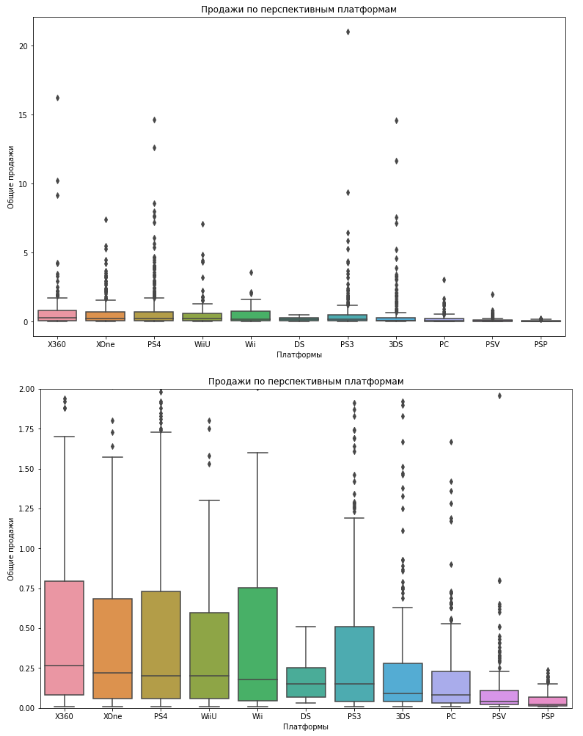

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>К сожалению, не знаю, как такой график строить, в теории этой темы очень мало для изучения</b></font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Можно вот так:</font>

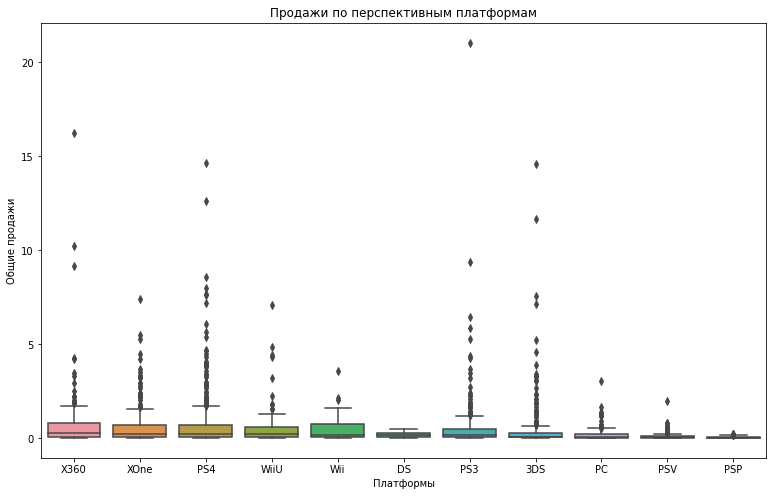

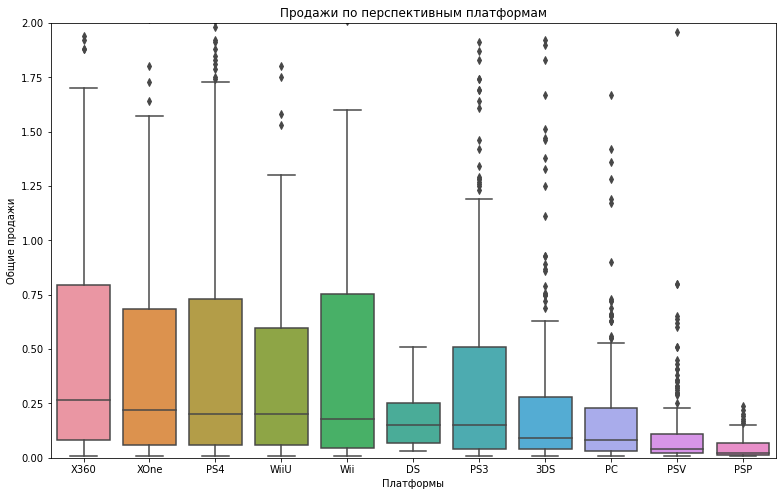

In [31]:
# Комментарий ревьюера 2
import seaborn as sns
data_temp, y = filtered_df.copy(), 'total_sales'
order=data_temp.groupby('platform')[y].median().sort_values(ascending=False).index # сортируем по медианам
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform', order=order)
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform', order=order)
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

Вывод: платформа X360 больше всех выделяется, потому что медиана и третий квартиль выше остальных платформ. Максимальная точка выше всех имеется у PS4. Недалеко находится XOne и Wii. Как мы видим, выбросы есть у всех платформ, кроме DS.

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Спасибо!</b></font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Для интерпретации диаграмм размаха помогает вспомнить, что означают боксплоты. В данном случае расположение боксплота и медианы показывают у какой платформы стабильно высокие продажи. Соответственно, Стримчик должен ориентироваться на такие платформы, так как какая игра в 2017 году выстрелит не известно.</font>
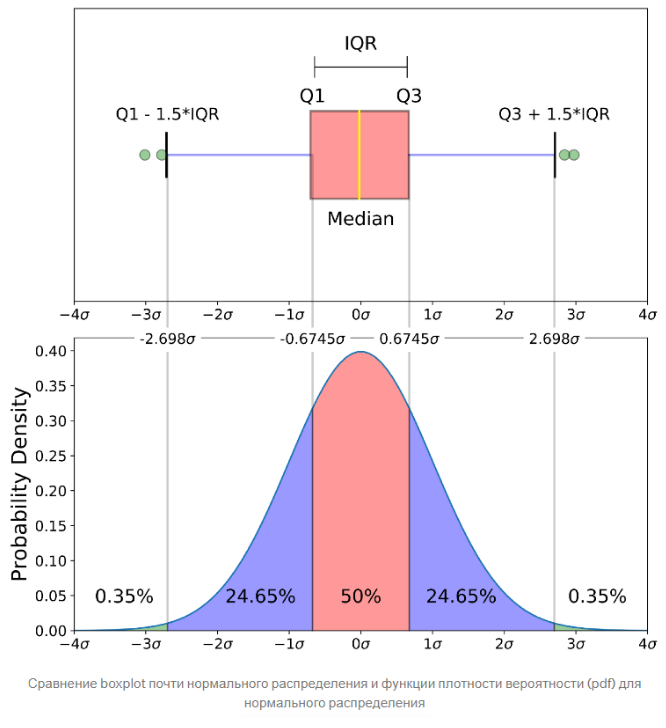

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <br><b>Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. <br>Не учитывайте в работе данные за предыдущие годы.</b> <br>После определения актуального периода дальнейший анализ должен проводиться только за этот период.</font> 

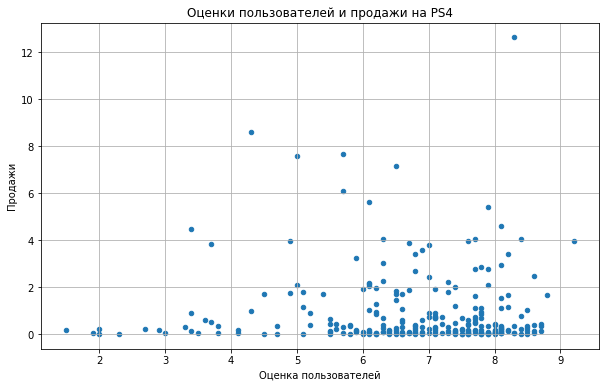

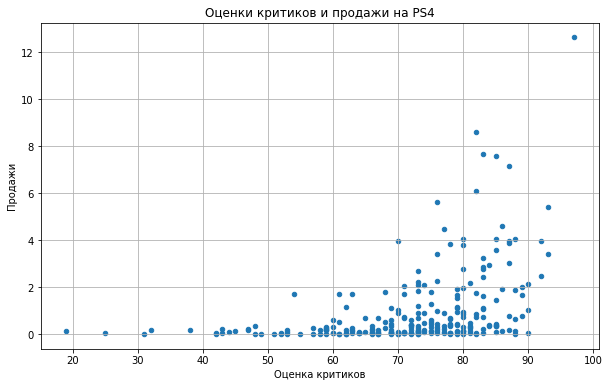

In [32]:
filtered_ps4 = filtered_df[filtered_df.platform == "PS4"] # Выберем PS4
user_score_filtered = filtered_ps4[filtered_ps4.user_score != -1]

user_score_filtered.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10, 6))
plt.title('Оценки пользователей и продажи на PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.grid()
plt.show()
                                   
critic_score_filtered = filtered_ps4[filtered_ps4.critic_score != -1]

critic_score_filtered.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10, 6))
plt.title('Оценки критиков и продажи на PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.grid()
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Не отфильтрована заглушка. Здесь и во всем разделе.</font>
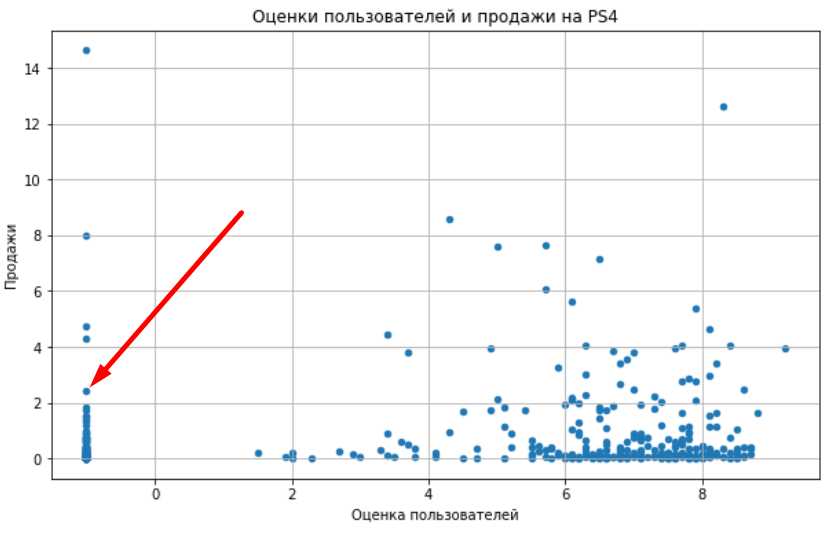

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Исправила актуальный период</b></font>

</font><font color='Blue'><b>Комментарий студента 2</b></font><br>
<font color='DarkBlue'><b>Отфильтровала заглушки</b></font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Конечно, диаграмма попарных отношений очень удобна, но в данном случае она не информативна, так как из-за малого масштаба данных отзывы просто сливаются. Следует использовать точечные диаграммы: `.plot(kind='scatter',......)`.</font><br>
<font color='Red'>🛠  Забыли отфильтровать заглушки в оценках критиков и пользователей.  И корреляцию считаем с заглушками. Только одновременно отфильтровывать их не надо. Если анализируем отзывы пользователей, то фильтруем заглушки по ним. Если анализируем отзывы критиков, то фильтруем эти заглушки. А вот удаление одновременно и тех и других ведет к необоснованному удалению данных.<br>Ошибка во всем разделе.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Исправила диаграмму. Отфильтровала заглушки, но не уверена, что корреляция получилась верная, потому что в `user_corr` не изменилось значение</b></font>

In [33]:
user_corr = user_score_filtered[['total_sales', 'user_score']].corr(method='spearman')
user_corr

,total_sales,user_score
total_sales,1.00000,-0.02834
user_score,-0.02834,1.00000


In [34]:
critic_corr = critic_score_filtered[['total_sales', 'critic_score']].corr(method='spearman')
critic_corr

,total_sales,critic_score
total_sales,1.000000,0.508238
critic_score,0.508238,1.000000


Вывод: между оценками пользователей/критиков и продажами на платформе PS4 нет сильной зависимости. Но мы можем сказать, что оценка критиков имеет гораздо больший вес, чем оценка пользователей. 

**Соотнесем выводы с продажами игр на других платформах.**

*Построим диаграммы рассеяния для других платформ с оценкой пользователей и продажами*

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа должен использоваться датасет актуального периода.</font>

Корреляция между оценками пользователей и продажами по платформе XOne  = -0.06892505328279414


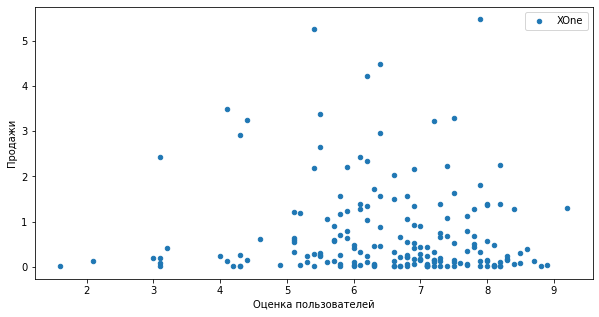

Корреляция между оценками пользователей и продажами по платформе PC  = -0.0938418695247674


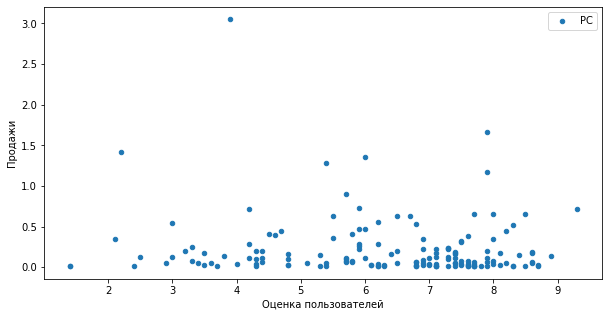

Корреляция между оценками пользователей и продажами по платформе WiiU  = 0.4193304819266187


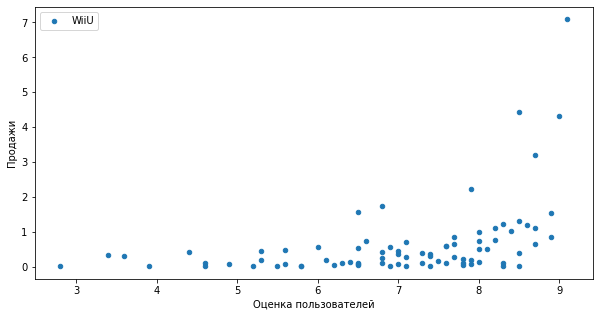

Корреляция между оценками пользователей и продажами по платформе 3DS  = 0.24150411773563016


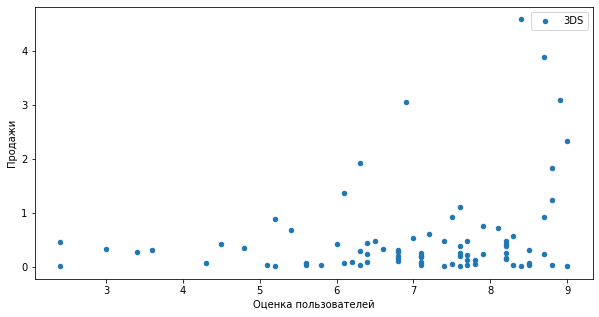

Корреляция между оценками пользователей и продажами по платформе PSV  = 0.0009424723319108626


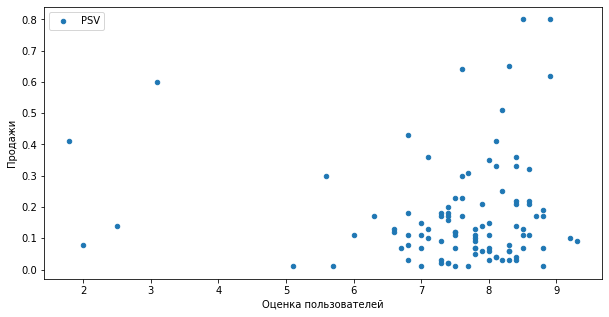

In [35]:
other_platforms = ['XOne','PC','WiiU','3DS', 'PSV']

for b in other_platforms:
    (
    filtered_df.query('platform == @b and user_score > -1')
        .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5))
    )
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.legend([b])
    print(f'Корреляция между оценками пользователей и продажами по платформе {b}  =', filtered_df.query('platform == @b and user_score > -1')['user_score'].corr(filtered_df.query('platform == @b and user_score > -1')['total_sales']))
    plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена. Не отфильтрованы заглушки. </font>
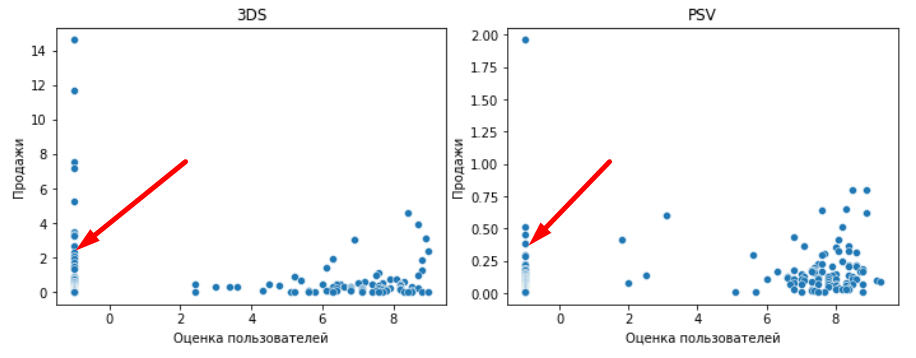
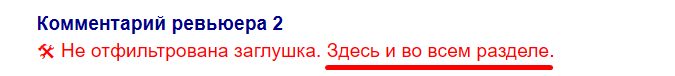

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Исправила актуальный период</b></font>

*Построим диаграммы рассеяния с оценкой критиков и продажами*

Корреляция между оценками критиков и продажами по платформе XOne  = 0.4169983280084017


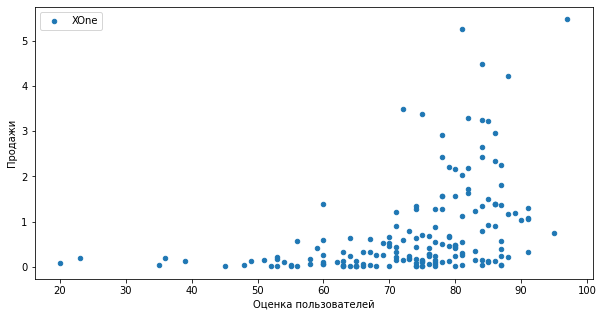

Корреляция между оценками критиков и продажами по платформе PC  = 0.19603028294369382


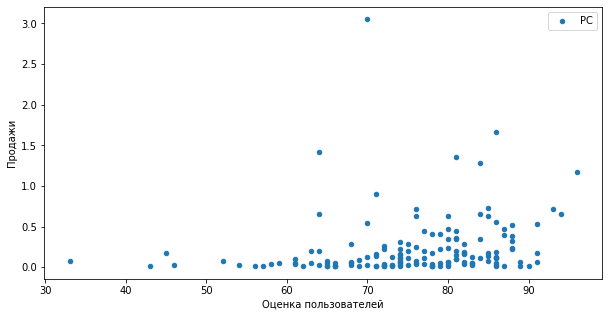

Корреляция между оценками критиков и продажами по платформе WiiU  = 0.3764149065423912


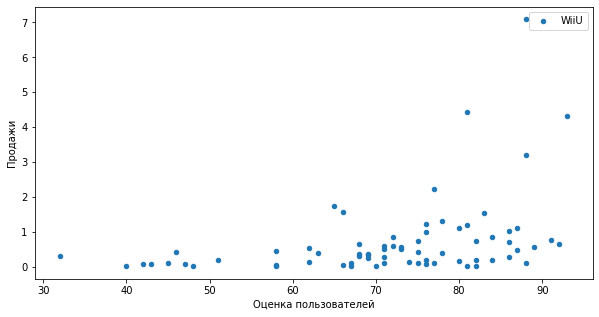

Корреляция между оценками критиков и продажами по платформе 3DS  = 0.3570566142288103


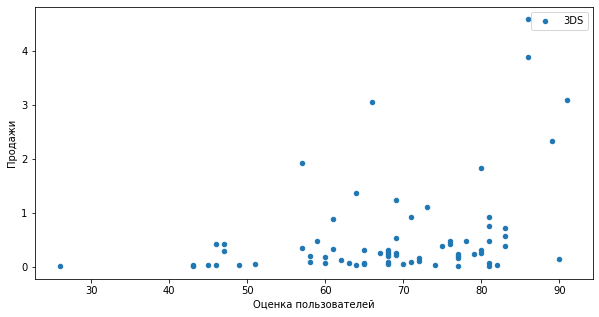

Корреляция между оценками критиков и продажами по платформе PSV  = 0.2547423503068656


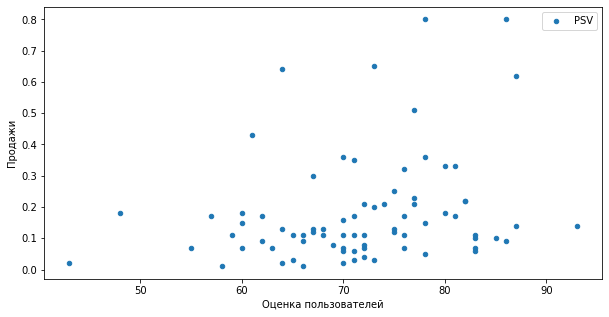

In [36]:
for b in other_platforms:
    (
    filtered_df.query('platform == @b and critic_score > -1')
        .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5))
    )
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.legend([b])
    print(f'Корреляция между оценками критиков и продажами по платформе {b}  =', filtered_df.query('platform == @b and critic_score > -1')['critic_score'].corr(filtered_df.query('platform == @b and critic_score > -1')['total_sales']))
    plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена. Не отфильтрованы заглушки. </font>
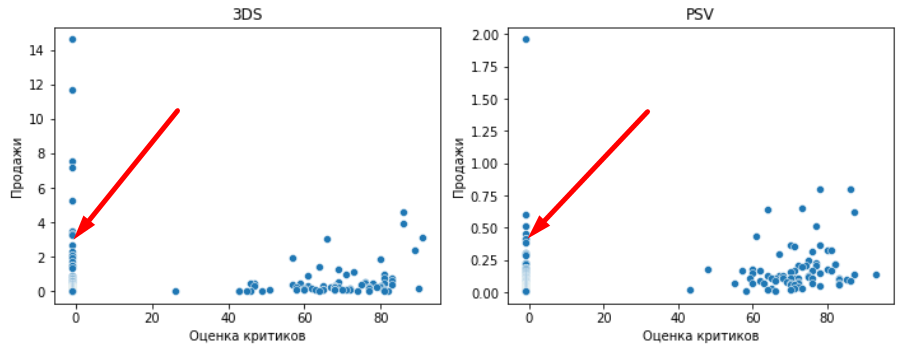

*Проведем корреляцию для тех же платформ*

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа должен использоваться датасет актуального периода.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Исправила актуальный период</b></font>

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена. Не отфильтрованы заглушки и корреляция считается вместе с заглушками. </font>

</font><font color='Blue'><b>Комментарий студента 3</b></font><br>
<font color='DarkBlue'><b>Вроде все исправила...</b></font>

<font color='DarkBlue'><b>Комментарий ревьюера 4</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена, корреляцию считаем с одновременной фильтрацией обоих заглушек, что сокращает выборку для анализа и делает анализ не валидным. См.код ниже.</font>
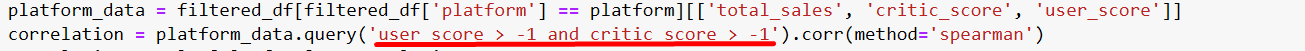

In [37]:
# Комментарий ревьюера 4
print(len(filtered_df.query("critic_score > -1")))
print(len(filtered_df.query("user_score > -1")))
print(len(filtered_df.query("critic_score > -1 & user_score > -1")))

991
1192
976


</font><font color='Blue'><b>Комментарий студента 4</b></font><br>
<font color='DarkBlue'><b>Ну вроде исправила(((( В графиках корреляцию вставила</b></font>

<font color='DarkBlue'><b>Комментарий ревьюера 5</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно.</font>

Вывод: слабая связь между оценками и продажами наблюдается у всех исследуемых платформ, но среди них можно выделить WiiU и PSV, корреляция между оценками пользователей и продаж которых гораздо выше других. То же касается и корреляции между оценками критиков и продажами у тех же платформ.

<font color='DarkBlue'><b>Комментарий ревьюера 5</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
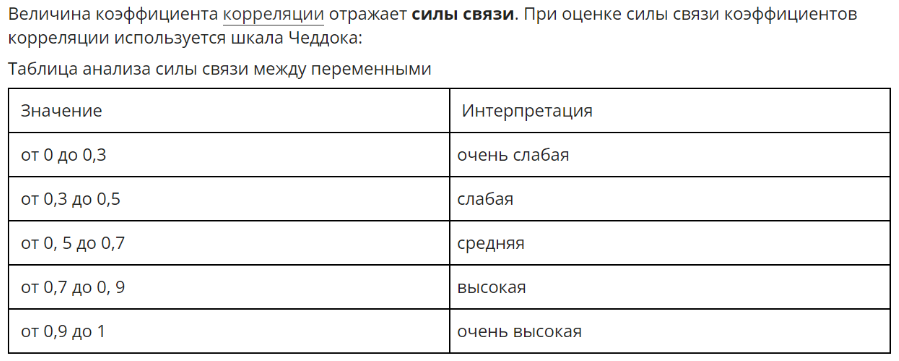

**Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

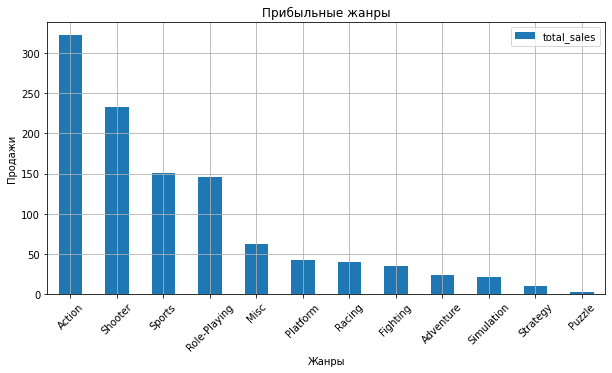

In [38]:
(
    filtered_df.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', grid=True, figsize=(10, 5))
)
plt.title('Прибыльные жанры')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.xticks(rotation=45)
plt.show()

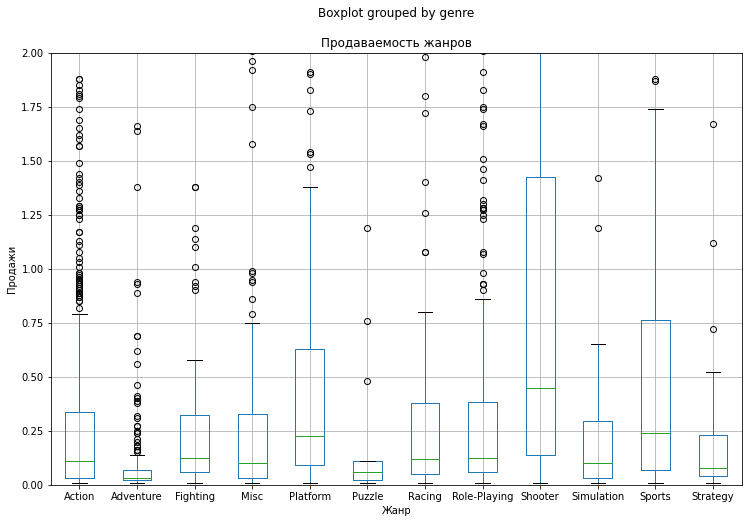

In [39]:
filtered_df.boxplot(by='genre', column=['total_sales'], figsize=(12, 8))
plt.ylim(0,2)
plt.title('Продаваемость жанров')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

Вывод: в период с 2013 по 2016 год жанр Action является самым продаваемым жанром, но Shooter является самым прибыльным жанром. Action - широкоиспользуемый жанр во многих играх, а Shooter - самый популярный. Жанр Puzzle выделяется среди других жанров своей низкой продаваемостью, а Adventure - своей непопулярностью. Возможно, это связано с тем, что вряд ли геймеру захочется переиграть игры этих жанров, как это может быть, например, с Shooter.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хороший анализ. Многие попадают в ловушку, что максимальные продажи являются самыми прибыльными. Но у нас в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы провалились. Но для прибыльности нам нужен стабильные жанры, который приносит доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.</font>

Вывод по 3 шагу: 
- пик выпуска игр приходится на 2008-2009 годы. С 1992 года наблюдается рост количества выпущенных игр
- больше всего продала игр платформа PS2
- жизненный цикл платформ в среднем занимает 10 лет
- с 2013 года лидируют платформы PS4 и XOne, но продажи резко снизились в 2015 году
- продажи слабо зависят от оценок, но оценка критиков имеет гораздо больший вес, чем оценка пользователей
- в период с 2013 по 2016 год жанр Action является самым продаваемым жанром, но Shooter является самым прибыльным жанром.

**Шаг 4. Составим портрет пользователя каждого региона**

**Определим для пользователя каждого региона (NA, EU, JP):**
- Самые популярные платформы (топ-5).

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 С какой целью фильтруем то, что ранее уже отфильтровано? Здесь и во всем разделе. </font>
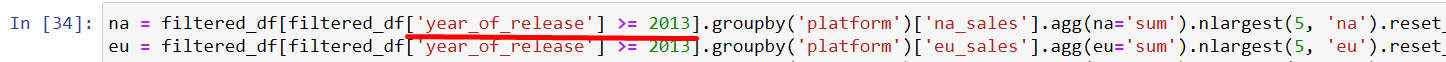

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Исправила</b></font>

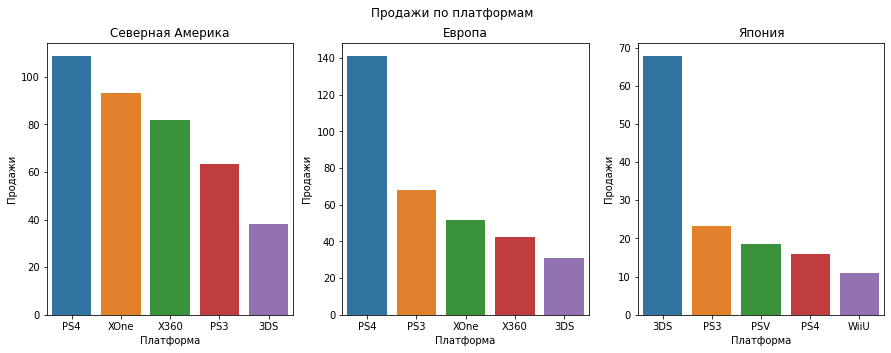

In [40]:
na = filtered_df.groupby('platform')['na_sales'].agg(na='sum').nlargest(5, 'na').reset_index()
eu = filtered_df.groupby('platform')['eu_sales'].agg(eu='sum').nlargest(5, 'eu').reset_index()
jp = filtered_df.groupby('platform')['jp_sales'].agg(jp='sum').nlargest(5, 'jp').reset_index()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Продажи по платформам')

sns.barplot(y='na', x='platform', data=na, ax=ax[0])
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи')
ax[0].set_xlabel('Платформа')

sns.barplot(y='eu', x='platform', data=eu, ax=ax[1])
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи')
ax[1].set_xlabel('Платформа')

sns.barplot(y='jp', x='platform', data=jp, ax=ax[2])
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи')
ax[2].set_xlabel('Платформа')
plt.show()

Вывод: в Северной Америке и Европе PS4 занимает первое место, а в Японии - это 3DS. А в Северной Америке и Европе 3DS занимает последнее место. В Японии на последнем месте стоит WiiU.

- Самые популярные жанры (топ-5). 

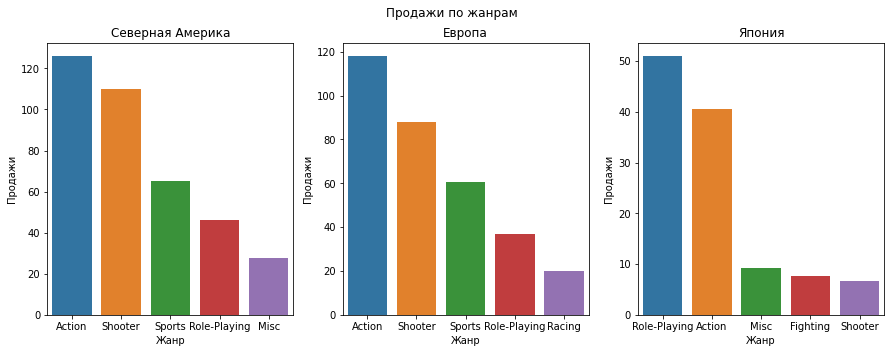

In [41]:
na = filtered_df.groupby('genre')['na_sales'].agg(na='sum').nlargest(5, 'na').reset_index()
eu = filtered_df.groupby('genre')['eu_sales'].agg(eu='sum').nlargest(5, 'eu').reset_index()
jp = filtered_df.groupby('genre')['jp_sales'].agg(jp='sum').nlargest(5, 'jp').reset_index()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Продажи по жанрам')

sns.barplot(y='na', x='genre', data=na, ax=ax[0])
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи')
ax[0].set_xlabel('Жанр')

sns.barplot(y='eu', x='genre', data=eu, ax=ax[1])
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи')
ax[1].set_xlabel('Жанр')

sns.barplot(y='jp', x='genre', data=jp, ax=ax[2])
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи')
ax[2].set_xlabel('Жанр')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 В задании просят сделать анализ по топ-5. И лучше визуализировать круговой диаграммой, только продажи платформ/жанров не вошедших в топ, собрать в одной группе, например "Другие", и по платформам, и по жанрам. Тогда на круговых диаграммах хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. Тогда визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм. Примерно вот так:</font>
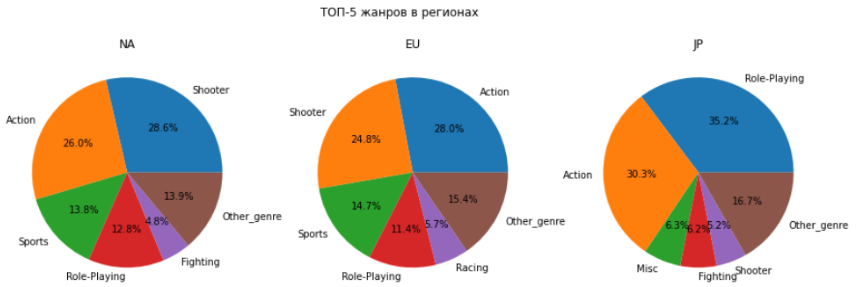

Вывод: жанр Action занял первое место по продажам в Северной Америке и Европе, а в Японии это Role-Playing. Последние места занимают Misc в Северной Америке, Racing - в Европе, и Shooter - в Японии.

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

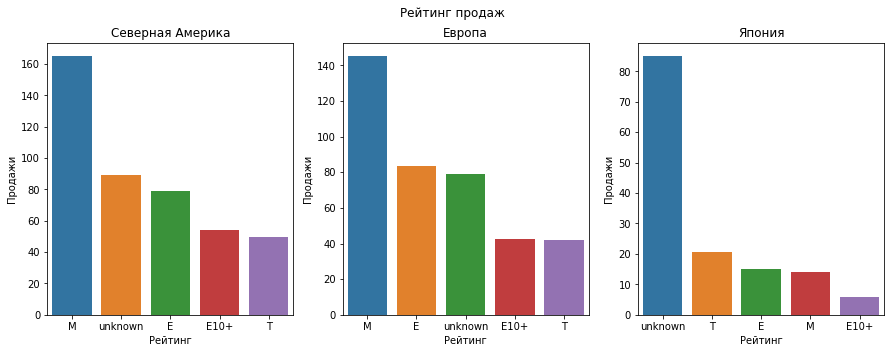

In [42]:
na = filtered_df.groupby('rating')['na_sales'].agg(na='sum').nlargest(5, 'na').reset_index()
eu = filtered_df.groupby('rating')['eu_sales'].agg(eu='sum').nlargest(5, 'eu').reset_index()
jp = filtered_df.groupby('rating')['jp_sales'].agg(jp='sum').nlargest(5, 'jp').reset_index()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Рейтинг продаж')

sns.barplot(y='na', x='rating', data=na, ax=ax[0])
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи')
ax[0].set_xlabel('Рейтинг')

sns.barplot(y='eu', x='rating', data=eu, ax=ax[1])
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи')
ax[1].set_xlabel('Рейтинг')

sns.barplot(y='jp', x='rating', data=jp, ax=ax[2])
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи')
ax[2].set_xlabel('Рейтинг')
plt.show()

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>У меня не получилось круговую диаграмму построить</b></font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Покажу на последнем ревью, если не забуду.</font>

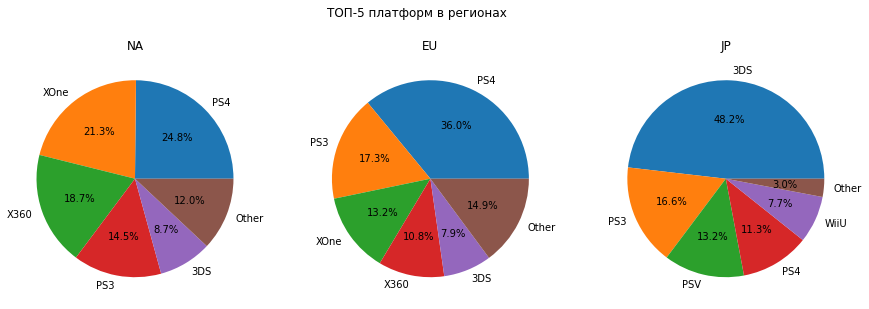

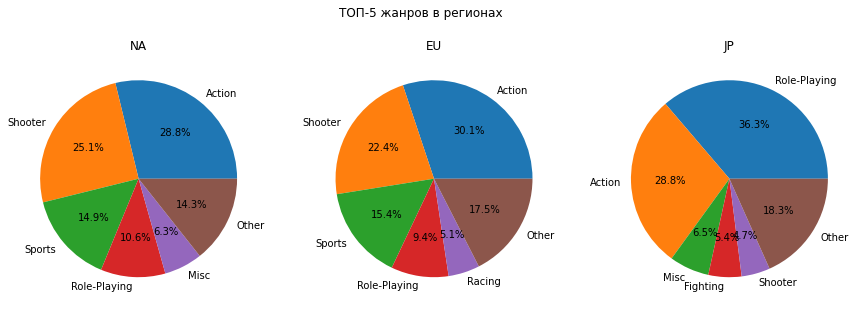

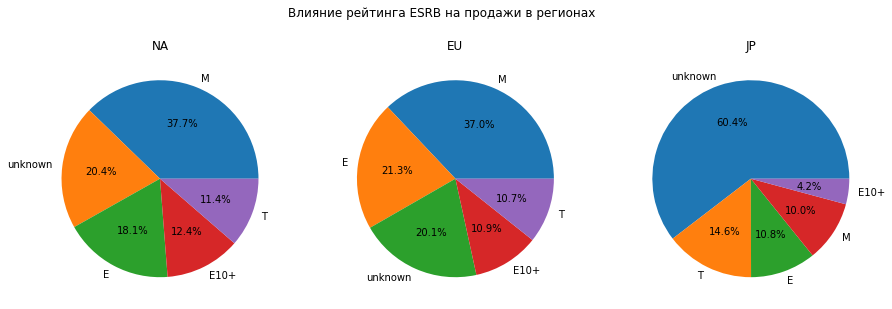

In [51]:
# Комментарий ревьюера 5
tmp = filtered_df.copy()                  # делаем копию текущего датасета, что бы не работать с исходным    
parametr = 'platform'                     # задаем имя колонки для построения диаграмм

def pie_chart(df, parametr = 'platform'): # в функцию передаем датасет и имя колонки платформ/жанров/рейтинга
    region = df.columns[4:7]              # создаем список регионов из названий колонок
                                          # начертим круговую диаграмму для каждого региона
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    if parametr == 'platform':            # будем рисовать диаграммы по платформам
        fig.suptitle('ТОП-5 платформ в регионах')
    elif parametr == 'genre':             # будем рисовать диаграммы по жанрам
        fig.suptitle('ТОП-5 жанров в регионах')
    elif parametr == 'rating':            # будем рисовать диаграммы по возрастному рейтингу
        fig.suptitle('Влияние рейтинга ESRB на продажи в регионах')
    for r in range(len(region)):
      if parametr != 'rating':            # здесь будет формировать топ-5 и группу "другие"
                                          # выберем 5 самых продающих платформ/жанров
        df_r = (df.groupby(parametr)[region[r]].sum().reset_index().
                sort_values(region[r], ascending = False, ignore_index = True)[:5])
                                          # занесем все остальные продажи в другие палатформы/жанры
        df_r = df_r.append({parametr: 'Other', region[r]: df[region[r]].sum() - df_r[region[r]].sum()}, ignore_index= True)
      else:                               # в возрастном рейтинге строим диаграммы по всем значениям
        df_r = (df.groupby(parametr)[region[r]].sum().reset_index().
                sort_values(region[r], ascending = False, ignore_index = True))
        
      axs[r].pie(df_r[region[r]], labels = df_r[parametr], autopct='%1.1f%%')
                                          # зададим название региона.
      axs[r].set_title(df_r.columns[1].split('_')[0].upper())
    plt.show()
    
pie_chart(tmp, parametr)                  # выводим диаграмму
pie_chart(tmp, 'genre')   
pie_chart(tmp, 'rating')   

Расшифровка рейтинга возрастной категории:
- EC - Для детей младшего возраста.
- E - Подходит для всех возрастных категорий.
- E10+ - Подходит для лиц старше 10 лет. 
- T - Подходит для лиц старше 13 лет.
- M - Подходит для лиц старше 17 лет.
- AO - Подходит для взрослых старше 18 лет. 
- RP - Категория ещё не присвоена.

Вывод: в Северной Америке и Европе первое место занял рейтинг M (для лиц старше 17 лет), в Японии - T (для лиц старше 13 лет), так как категория, занимающая первое месте, еще не определена. В это же время категория T стоит на последнем месте в Северной Америке и Европе. В Японии на последнем месте стоит рейтинг E10+ (для лиц старше 10 лет).

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Вот такая проблема была с рейтингом. <br>
Дело в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. А в Японии есть свой рейтинг, свой рейтинг есть в ЕС и отдельно в Германии, Австралии и т.д., но по ним в датасете нет данных. То есть, в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе. Необходимо шире смотреть на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. Это необходимо учитывать при предобработке данных.</font>

Вывод по 4 шагу: портрет пользователя в Северной Америке и Европе очень похож. Пользователи данных стран предпочитают играть на платформе PS4, игры жанра Action и возрастную категорию старше 17 лет. В Японии портрет пользователя совершенно отличается - предпочтение отдается игровой платформе 3DS, играм жанра Role-Playing не определенной возрастной категории.

**Шаг 5. Проверим гипотезы**

- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [43]:
xbox_rating = filtered_df.query('platform == "XOne" and user_score > 0')
pc_rating = filtered_df.query('platform == "PC" and user_score > 0')

results = st.ttest_ind(xbox_rating['user_score'], pc_rating['user_score'], equal_var=False, alternative='two-sided')
print('p-значение:', results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что отфильтровали заглушки.</font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест.</font>

In [44]:
xbox_rating['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [45]:
pc_rating['user_score'].describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Вывод: не отвергаем нулевую гипотезу, значит может имеем право полагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые при пороговом значении 0,05.

In [46]:
filtered_scores = filtered_df[filtered_df['user_score'] > 0]
mean_score_by_platform = filtered_scores.groupby('platform')['user_score'].mean().reset_index()
mean_score_by_platform = mean_score_by_platform.sort_values(by='user_score', ascending=False)
display(mean_score_by_platform)

,platform,user_score
6,PSV,7.527273
8,WiiU,7.017500
0,3DS,6.976250
4,PS4,6.748249
10,XOne,6.521429
3,PS3,6.348387
2,PC,6.269677
9,X360,5.993007
5,PSP,5.850000
7,Wii,5.257143


<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Хорошо, исправили.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 При расчете среднего значения не отфильтровали заглушку.</font>

Проверим еще одну гипотезу:
- H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
- H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [47]:
action_rating = filtered_df.query('genre == "Action" and user_score > 0')
sports_rating = filtered_df.query('genre == "Sports" and user_score > 0')

results = st.ttest_ind(action_rating['user_score'], sports_rating['user_score'], equal_var=False, alternative='two-sided')
print('p-значение:', results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [48]:
action_rating['user_score'].describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [49]:
sports_rating['user_score'].describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

Вывод: отвергаем нулевую гипотезу, соответственно, мы можем сказать, что средние пользовательские рейтинги жанров Action и Sports разные при пороговом значении 0,05.

In [50]:
filtered_scores = filtered_df[filtered_df['user_score'] > 0]
mean_score_by_genre = filtered_scores.groupby('genre')['user_score'].mean().reset_index()
mean_score_by_genre = mean_score_by_genre.sort_values(by='user_score', ascending=False)
display(mean_score_by_genre)

,genre,user_score
5,Puzzle,7.471429
1,Adventure,7.461667
7,Role-Playing,7.376471
2,Fighting,7.037500
3,Misc,6.975000
0,Action,6.837532
4,Platform,6.713793
8,Shooter,6.342308
11,Strategy,6.183333
6,Racing,6.080000


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Тут аналогичная ошибка, не отфильтрована заглушка. </font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Отфильтровала заглушки</b></font>

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно.</font>

Пояснения: 
- Как вы сформулировали нулевую и альтернативную гипотезы: если значений в выборке много (30 и больше), то распределение Стьюдента настолько близко к нормальному, что можно было бы просто взять нормальное распределение без степеней свободы.
- Какой критерий применили для проверки гипотез и почему: мы применяли статистический тест на равенство среднего генеральной совокупности с использованием t-теста (распределение Стьюдента).

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Было бы правильным показать дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез, используя метод `.mean()` для выборок.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Добавила</b></font>

**Шаг 6. Общий вывод**

В ходе анализа данных интернет-магазина "Стримчик" были выполнены следующие шаги:

1. Изучена общая информация
- датафрейм содержит 16715 записей
- названия столбцов некорректные, нужно привести к нижнему регистру
- в таблице есть пропуски
- у некоторых столбцов некорректный тип данных.

2. Подготовка данных
- дубликатов в таблице нет
- привели названия столбцов к нижнему регистру
- обработали пропуски
- изменили тип данных
- посчитали суммарные продажи во всех регионах
- разобрали значение tbd ("будет определено позже", то есть оценку еще не поставили).

    Пропусками могли послужить человеческий фактор и сбои в программе.
    
3. Провели исследовательский анализ данных
- пик выпуска игр приходится на 2008-2009 годы. С 1992 года наблюдается рост количества выпущенных игр
- больше всего продала игр платформа PS2
- жизненный цикл платформ в среднем занимает 10 лет
- с 2013 года лидируют платформы PS4 и XOne, но продажи резко снизились в 2015 году
- продажи слабо зависят от оценок, но оценка критиков имеет гораздо больший вес, чем оценка пользователей
- в период с 2013 по 2016 год жанр Action является самым продаваемым жанром, но Shooter является самым прибыльным жанром.

4. Составили портрет пользователя каждого региона
    Портрет пользователя в Северной Америке и Европе очень похож. Пользователи данных стран предпочитают играть на платформе PS4, игры жанра Action и возрастную категорию старше 17 лет. В Японии портрет пользователя совершенно отличается - предпочтение отдается игровой платформе 3DS, играм жанра Role-Playing не определенной возрастной категории.
    
    
5. Не отвергаем нулевую гипотезу, значит может имеем право полагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые при пороговом значении 0,05.  отвергаем нулевую гипотезу, соответственно, мы можем сказать, что средние пользовательские рейтинги жанров Action и Sports разные при пороговом значении 0,05.

В 2017 году интернет-магазин "Стимчик" может спланировать рекламную кампанию в отношении игр возрастной категории M (для Северной Америки и Европы), T (для Японии), E (для Европы) и жанра Action и Shooter, отличительные черты которых являются активный геймплей и сражения, так как они в последнее время набирают все большую популярность. Также можно выделить деньги на рекламную кампанию на платформы PS4 (для геймеров в Северной Америке и Европе) и 3DS (в Японии). Реклама жанра Action отлично подойдет для всех регионов, а Shooter - для Северной Америки и Европы. Если хватит рекламного бюджета, можно еще пропрекламировать Role-Playing для пользователей Японии. Вдобавок, не всегда стоит обращать внимание на отзывы пользователей, так как они не влияют на продаваемость и популярность игры, но можно прислушаться к критикам, они дают более информативные оценки.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Цель исследования понять, на что потратить рекламный бюджет. В исследовании проанализированы игры с разных сторон. Логично, что рекламный отдел ждет данные на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет.<br>Вся информация в проекте уже есть, надо просто акцентировать на какие игры тратить рекламный бюджет. Дополним вывод?</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Дополнила</b></font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Алина, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Сделать проверку неявных дубликатов. Переделать обработку пропусков и значения 'tbd' в колонке отзывов пользователей. Анализ проводить только за актуальный период. Переделать диаграммы рассеяния при анализе отзывов. Раздельно отфильтровать заглушки при анализе отзывов.<br>Обращаю внимание, что после исправления ошибок необходимо будет откорректировать выводы анализа.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов будут приобретены дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Алина, увы, остались еще ошибки.<br></font>
<font color='Red'>🛠 Что нужно доделать:</font><br>
<font color='Red'>🛠 Раздельно отфильтровать заглушки при анализе отзывов. Отфильтровать заглушку в разделе тестирования гипотез.<br>Надо будет проверить выводы,  при необходимости  откорректировать.</font><br>
<font color='DarkGreen'>👌 Жду исправленный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 3</b></font><br><br>
<font color='DarkGreen'>👌 Алина, остались ошибки.<br></font>
<font color='Red'>🛠 Что нужно сделать:</font><br>
<font color='Red'>🛠 Раздельно отфильтровать заглушки при анализе отзывов. </font><br>
<font color='DarkGreen'>👌 Жду исправленный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 4 (4-тое ревью из 6-ти возможных)</b></font><br><br>
<font color='DarkGreen'>👌 Алина, остались ошибки.<br></font>
<font color='Red'>🛠 Что нужно сделать:</font><br>
<font color='Red'>🛠 Раздельно отфильтровать заглушки в анализе отзывов при расчете корреляции. </font><br>
<font color='DarkGreen'>👌 Жду исправленный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 5</b></font><br><br>
<font color='DarkGreen'>👌 Алина! Удалось справиться со всеми подводными камнями в проекте.  Молодец! 😄<br>
Входе выполнения проекта узнали, что не все пропуски просто ошибки сбора данных, а несут свои признаки. Для этого понадобилось за данными датасета увидеть смысл этих данных и бизнес-процессы, которые за ними скрываются. Узнали, что медианы могут дать дополнительную информацию при анализе. Это новые знания и навыки, которые пригодятся в будущем!<br></font>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>
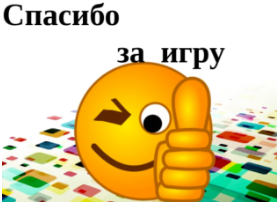